In [1]:
# Importing the required libraries which can be used in this project

In [2]:
import tensorflow
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
data_dir=r"C:\Users\kashr\Documents\Deep Learning projects\Automatic recognition of pollution levels from street images\Air Pollution Image Dataset\Air Pollution Image Dataset\Combined_Dataset\IND_and_NEP"
categories=["a_Good", "b_Moderate", "c_Unhealthy_for_Sensitive_Groups","d_Unhealthy","e_Very_Unhealthy","f_Severe"]


In [4]:
data=[]
labels=[]
for idx,category in enumerate(categories):
    path=os.path.join(data_dir,category)
    for img_name in os.listdir(path):
        img_path=os.path.join(path,img_name)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(128,128))  #resizing images to 128*128
        data.append(img)
        labels.append(idx)
data=np.array(data)
labels=np.array(labels)

In [5]:
data=data/255.0 # normalizing the pixel values


In [6]:
#The batch size specifies how many augmented images will be processed by the model in each batch during training, at every epoch.

In [7]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,random_state=42,test_size=0.2)

In [8]:
# Image Data Augmentation

In [9]:
datagen=ImageDataGenerator(width_shift_range=0.2,rotation_range=30,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
datagen.fit(X_train)

# Building CNN Model

# Adding layers

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

# Adding flatten layer to convert 2d into 1d because dense or fully connected layers because it requires a 1d input vector
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(categories),activation='softmax')) #output layer

C:\Users\kashr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,313,286 (12.64 MB)

 Trainable params: 3,313,286 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling and Training the model

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
callback=EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=5,verbose=1)

In [17]:
history=model.fit(datagen.flow(X_train,y_train,batch_size=32),validation_data=(X_test,y_test),epochs=25,callbacks=callback)

Epoch 1/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 183s 762ms/step - accuracy: 0.4686 - loss: 1.2940 - val_accuracy: 0.6449 - val_loss: 0.9430
Epoch 2/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 170s 712ms/step - accuracy: 0.5507 - loss: 1.1003 - val_accuracy: 0.6702 - val_loss: 0.8164
Epoch 3/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 159s 665ms/step - accuracy: 0.5971 - loss: 0.9862 - val_accuracy: 0.6902 - val_loss: 0.7374
Epoch 4/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 162s 681ms/step - accuracy: 0.6378 - loss: 0.9077 - val_accuracy: 0.7459 - val_loss: 0.6835
Epoch 5/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 160s 670ms/step - accuracy: 0.6862 - loss: 0.8062 - val_accuracy: 0.7007 - val_loss: 0.6811
Epoch 6/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 167s 701ms/step - accuracy: 0.6854 - loss: 0.7799 - val_accuracy: 0.7775 - val_loss: 0.5744
Epoch 7/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 167s 701ms/step - accuracy: 0.7249 - loss: 0.6923 - val_accuracy: 0.8027 - val_loss: 0.5152
Epoch 8/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 215s 902ms/step - accuracy: 0.7461 -

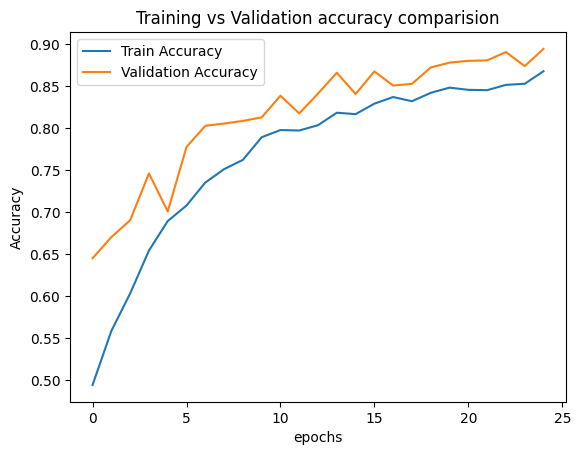

In [18]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation accuracy comparision')
plt.legend()
plt.show()         

In [19]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)



60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.8979 - loss: 0.2479


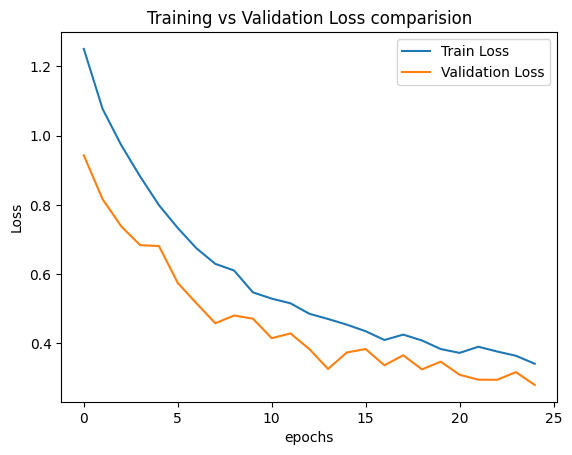

In [21]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss comparision')
plt.legend()
plt.show()       